# Wprowadzenie

Tym razem będziemy pracować nad klasyfikatorem opartym o drzewa decyzyjne.
Będziemy wykonywać (podobnie jak w poprzednich przypadkach) następujące kroki:


1. Ładowanie danych
2. Podział na treningowe i testowe
3. Własne, prosta implementacja elementów drzewa, żeby zrozumieć, jak działa
4. Utworzenie i eksploracja modelu z biblioteki
5. Dopasowywanie parametrów modelu
6. Końcowy test na danych testowych
7. Wizualizacja wyników

Twoim zadaniem będzie wypełnienie fragmentów kodu zawierających 

> ...

## Import bibliotek

In [78]:
import pandas as pd
import sklearn.model_selection as modsel
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import graphviz 
import sklearn.tree as trees

from sklearn.tree import DecisionTreeClassifier

from scipy.stats import entropy
from sklearn.model_selection import train_test_split

## Wczytanie danych

In [40]:
data = pd.read_csv("./adult.csv")

In [41]:
# Print top 10 rows of a dataset

data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: 
Ronny Kohavi and Barry Becker,

Data Mining and Visualization

Silicon Graphics.

e-mail: ronnyk@sgi.com for questions.

Extraction was done by Barry Becker from the 1994 Census database.

Prediction task is to determine whether a person makes over 50K a year. 

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **fnlwgt**: continuous. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



Zmienna zależna to **earnings** czyli zarobki roczne

Podział da zmienne zależne i niezależne

In [42]:
X = data. ...
y = data. ...

## Zamiana zmiennych tekstowych na binarne


Ten zbiór danych zawiera zmienne o charakterze tekstowym oraz dyskretnym, tzn. wartości pochodzące z określonego zbioru, nienumeryczne.

Biblioteki w Pythonie nie potrafią obslugiwać tego rodzaju danych - trzeba je zamienić na tzw. zmienne binarne.

* dla każdego atrybutu zostają utworzone kolumny-pary: atrybut-wartość. Np.:

>> occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial
>> occupation:Tech-support, occupation:Craft-repair, occupation:Sales, etc.

* każda taka para staje się kolumną i wartość w komórce = 1, jeśli odpowiednia wartość atrybutu występuje w obiekcie

In [43]:
X = pd.get_dummies(X)
X.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_TrinadadTobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Podział na zbiór treningowy i testowy

Zawsze należy dokonać tego podziału w pierwszej kolejności. Dane testowe zostawiamy na sam koniec, do sprawdzenia trafności.

* Zawsze używaj opcji **random seed** aby zapewnić, że eksperyment będzie powtarzalny!
* Jeśli chodzi o wielkość danych testowych - trzeba zachować zdrowy rozsądek i wybierać tak, żeby odzwierciedlały proporcje danych oryginalnych


In [45]:
RANDOM_SEED = 10
TEST_SIZE = 0.2

In [46]:
X_train, X_test, y_train, y_test = train_test_split( ... )

Sprawdzamy, jak wyglądają proporcje danych

In [47]:
X_train.shape

(26048, 108)

In [48]:
X_test.shape

(6513, 108)

In [49]:
y_train.shape

(26048,)

In [50]:
y_test.shape

(6513,)

Ważne jest też sprawdzenie, jakie są proporcje poszczególnych klas w zbiorze danych. To będzie bardzo mocno oddziaływać na metryki jakości dopasowania.

Żeby się o tym przekonać możemy:

* Wyświetlić informacje o procentowej zawartości poszczególnych klas w danych treningowych
* Wyświetlić wykres kołowy albo słupkowy, pokazująacy udział klas

In [51]:
pd.value_counts( ... )

<=50K    0.75979
>50K     0.24021
Name: earnings, dtype: float64

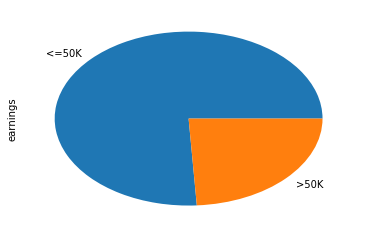

In [52]:
pd.value_counts( ... ).plot( ... )

Ważne pytanie - czy ten zbiór wygląda na zbalansowany czy nie? Jak to może wpłynąć na predykcje?

# Jak działa drzewo decyjne

## Algorytm

Nauczymy się, jak działa drzew o decyzyjne, używając napisanego ręcznie, prostego kodu. Drzewo decyzyjne działa w sposób nastęujący:


1. __Krok 1__: sprawdź poziom **entropii** danych - poziom "wymieszania" klas
    1. Jeśli entropia jest mała (poniżej pewnego poziomu) - wybierz klasę dominującą
    2. Jeśli w zbiorze jest mniej niż pewna ilość rekordów - wybierz klasę dominującą
2. __Krok 2__:
    1. Dla każdego atrybutu dla każedej wartości
    2. Podziel dane na:
        - posiadające daną wartość atrybutu
        - nieposiadającą wartości atrybutu
        
    3. Policz stopień zmieszania każdego podzbioru a następnie wylicz ich średnią ważoną ilością elementów
    4. Policz, w jakim stopiniu podział zmniejszył "zmieszanie"/chaos w danych
3. __Krok 3__: wybierz podział, który w największym stopiniu zredukował chaos
4. __Krok 4__: dla każdego z dwóch podzbiorów - idź do kroku 1.
    

Doskonały przewodnik z ilustracjami krok - po kroku [znajduje się tutaj](https://www.saedsayad.com/decision_tree.htm)

Zdefiniujmy kilka funkcji, które realizują opisane zadania

In [53]:
def calculate_chaos(y):
    return entropy(pd.value_counts(y))

Garść przykładów:

In [57]:
# liczenie entropii całego zbioru danych:

chaos_all_data = calculate_chaos(y_train)
print(chaos_all_data)

# liczenie entropii tylko jednej klasy - powinna wynosić 0


calculate_chaos(y_train[y_train == ">=50k"])

0.5513223084624267


0.0

In [60]:
# Podzielmy dane wg. jakiegoś atrybutu, np. płeć:

males_select = X_train.sex_Male == 1
females_select = X_train.sex_Female == 1

# Wydzielenie odpowiednich wart. y

y_male = y_train[males_select]
y_female = y_train[females_select]

# Policzenie entropii dla podgrup

male_chaos = calculate_chaos(y_male)
female_chaos = calculate_chaos(y_female)

print(male_chaos, female_chaos)

# Policzenie entropii (chaosu) ważonego licznością:

weighted_chaos = (male_chaos * y_male.shape[0] + female_chaos * y_female.shape[0]) / (y_male.shape[0] + y_female.shape[0])

print(weighted_chaos)

# Policzenie redukcji chaosu:

chaos_all_data - weighted_chaos

0.614993466528243 0.34536236299669343
0.5257133579609974


0.025608950501429306

Twoje zadanie: napisz samodzielnie kod, który przejrzy wszystkie atrybuty i podzielii wg. nich dane. Zobacz, który podział jest najlepszy i wybierz odpowiedni atrybut.

**Podpowiedź**: po binaryzacji, wszystkie atrybuty są zerami i jedynkami. Wystraczy sprawdzić, gdzie w danej kolumnie jest 0 albo 1.

In [61]:
# spróbuj to napisać =)

### Tematy do dyskusji


1. Jakie widać problemy i ograniczenia w drzewach decyzyjnych?
2. Jaki rodzaj podziałów stosowało drzewo w tym przykładzie? Czy widzisz jakieś inne możliwe podziały?
3. Jak rozwiązał(-ała) byś kwestię atrybutów numerycznych? Czy jest to łatwiejsze czy trudniejsze zadanie?

# Drzewo decyzyjne z użyciem biblioteki

## Sprawdzenie trafności na zbiorze treningowym i testowym

Użyj walidacji krzyżowej - 10-o krotnej -  do oceny trafności algorytmu na podanych zbiorach danych.

Pamiętaj: **używaj tylko danych treningowych, a nie testowych**

In [63]:
dt = DecisionTreeClassifier()
scores = modsel.cross_val_score( ... )

Wyświetl uzyskane wyniki:

In [64]:
scores

array([0.81772832, 0.82533589, 0.8084453 , 0.81151631, 0.82763916,
       0.81765835, 0.81535509, 0.81490015, 0.81682028, 0.82066052])

Wyświetl wyniki w formie wykresów pudełkowych. Jaki jest rozrzut - duży, czy mały?

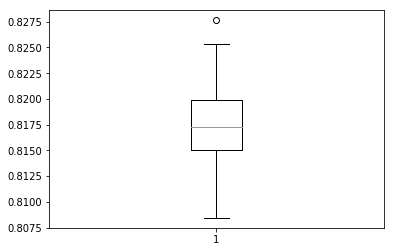

In [66]:
_ = plt.boxplot( ... )

Spróbuj wybrać parametry, które można zmienić w drzewie decyzyjnym. Ustal kilka wartości i poszukaj w 3-y krotnej walidacji krzyżowej, która kombinacja da najlepsze rezultaty.

In [70]:
params_grid = {
    'max_depth': [ 3, 6, 15 ], 
    'min_samples_split': [2, 10], 
    'min_samples_leaf': [1, 5], 
    'max_features': [None, 'auto', 'sqrt'] 
}

In [71]:
grid_search = modsel.GridSearchCV( ... )

Wyszkol system przeszukiwania parametrów na danych treningowych.

In [72]:
best_grid = grid_search.fit( ... )

Sprawdź najlepsze parametry:

In [ ]:
....

Wybierz najlepszy model:

In [76]:
best_model = best_grid. ... 

## Final prediction on test data

Teraz wykonaj predykcje na **zbiorze danych testowych**.

In [77]:
results = best_model.predict( ... )

Sprawdź metryki trafności oraz całe zestawienie klasyfikacyjne

In [79]:
accuracy = metrics.accuracy_score( ... )
accuracy

0.8502994011976048

In [80]:
print(metrics.classification_report( ... ))

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4929
        >50K       0.80      0.52      0.63      1584

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.83      0.74      0.77      6513
weighted avg       0.84      0.85      0.84      6513



## Wizualizacja drzewa

Zwizualizujmy nasz końcowy wynik - drzewo decyzyjne można przestawić graficznie.

Musimy wyszkolić drzewo jako "osobne" (niewchodzące w skład całego procesu selekcji parametrów), żeby zachowało nazwy zmiennych, itp.

Użyjemy najlepszych dostępnych parametrów.

In [84]:
dt = DecisionTreeClassifier(**best_grid.best_params_)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**UWAGA** ta część działa bardzo dziwnie pod Windowsem. Na Macu i na Linuxie nie powinno być problemu, aczkolwiek.... może być różnie. Dlatego wynik działania wizualizacji można zobaczyć na stronie

In [88]:
dot_data = trees.export_graphviz(dt, out_file='result_tree.dot') 
# Otwórz plik: result_tree.dot i skopiuj jego zawartość do formularza na stronie: http://webgraphviz.com/

Dla osób, które działają na Macach albo na Linuxach, trzeba wykonać następujące polecenia i będzie działać. Trzeba doinstalować pakiet **graphviz**

```{bash}
pip install grapviz

sudo apt-get install graphviz
```

A potem można wykonać takie polecenia

```{python}

import graphviz 
dot_data = trees.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
```


# Radnom forest

## Jak działa Random Forest

Random forest to "las losowy" - wielokrotnie szkolone drzewo decyzyjne, do którego podawany jest za każdym razem inny zestaw danych:

1. Inne wiersze
2. Losowo wybrane kolumny

Zazwyczaj szkoli się kilkaset lub nawet kilka tysięcy drzew. Dzięki temu uzyskuje się lepszą trafność predykcji.

Algorym działa następująco:

Parametry:

* ilość drzew do wyszkolenia - n
* ile (losowych) kolumn ma dostawać każde drzewo
* ile (losowo wybranych) wierszy ma dostawać każde drzewo
* czy końcowy wynik ma być głosowaniem większościowym czy ważonym?


Następnie dla KAŻDEGO DRZEWA od 1 do N

1. __Krok 1__: Losowo wybierz wiersze ze zbioru X_train. Utwórz w ten sposób zbiór: X_train_1 oraz X_train_2 z tych elementów, które nie zostały wybrane.

2. __Krok 2__: Losowo wybierz kolumny ze zbiory X_train_1.

3. __Krok 3__: Wyszkol drzeow na X_train_1. Sprawdź jego trafność na zbiorze X_train_2.

4. __Krok 4__: Zapisz drzewo i jego wynik


Aby dokonać predykcji na zbiorze testowym albo dowolnym innym - **nowym** zbiorze danych:

1. __Krok 1__: Przepuść dane przez każde z drzew. Zapisz predykcje tego drzewa.

2. __Krok 2__:
    1. Jeśli wynik ma być większościowy: dla każdego elementu w nowym zbiorze wybierz klasę najczęściej wskazywaną przez drzewa.
    2. Jeśli wynik ma być ważony: dla każdego elementu w nowym zbiorze wybierz klasę, która ma największą wagę - wagą jest 
$$ \frac{1}{err_i + \epsilon } $$ gdzie
        $$err_i \ \text{to błąd i-tego drzewa} $$ 
        $$\epsilon \ \text{to mała liczba, pozwalająca (w razie czego) uniknąć dzielenia przez zero } $$ 

## Zrób to sam


Spróbuj samodzielnie napisać algorytm Random Forest używając.... istniejących drzew decyzyjnych. 

## Użycie biblioteki

In [89]:
from sklearn.ensemble import RandomForestClassifier

Random forest ma szereg parametrów, które można dostosowywać, tak jak to opisano w części wcześniejszej:

1. **n_estimators/Number of trees** - ilość drzew do wyszkolenia. Im więcej, tym lepiej, ale trening zajmie dłużej
2. **max_features/Number of features** - Ile losowo wybranych atrybutów ma mieć każde drzewo?
3. **max_depth/Tree depth** - głębokość każdego drzewa z osobna
3. **n_jobs** - ponieważ każde drzewo jest niezależne, to można je szkolić równolegle. Ile wątków ma być używane w tym celu?

Znając specyfikację modelu Random Forest, postaraj się po kolei:

1. Wyszkolić pojednyczy model, z domyślnymi parametrami.
2. Ręcznie zmienić część parametrów i zobaczyć, jak wpływa to na wynik
3. Przeszukać przestrzeń parametrów i znaleźć najlepszy model
4. Sprawdzić wynik na danych testowych.

Powtarzamy kroki z drzewa decyzyjnego.